In [20]:
%matplotlib inline

## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results

## Drop Duplicates from study_results DF Total = 1
# study_result_drop_duplicate = study_results.drop_duplicates(['Mouse ID', 'Timepoint'])
# study_result_drop_duplicate
# study_result_duplicate[study_result_duplicate['Mouse ID'] =='g989']  ##to see if there are any duplicates remaining or now


# Combine the data into a single dataset
scc_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
scc_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
scc_df['Mouse ID'].count()

1893

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
scc_df[scc_df[['Mouse ID', 'Timepoint']].duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 



In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
scc_df_drop_duplicate = scc_df.drop_duplicates(['Mouse ID', 'Timepoint'])
scc_df_drop_duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
scc_df_drop_duplicate['Mouse ID'].count()


1888

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Column = scc_df_drop_duplicate['Tumor Volume (mm3)']

group_scc_df = scc_df_drop_duplicate.groupby(['Drug Regimen'])
group_scc_df
# Column = group_scc_df['Tumor Volume (mm3)']

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_scc_mean_df = group_scc_df['Tumor Volume (mm3)'].mean()

group_scc_median_df = group_scc_df['Tumor Volume (mm3)'].median()

group_scc_var_df = group_scc_df['Tumor Volume (mm3)'].agg(np.var, ddof=1)

group_scc_std_df = group_scc_df['Tumor Volume (mm3)'].agg(np.std, ddof=1)

group_scc_SEM_df = group_scc_df['Tumor Volume (mm3)'].agg(st.sem, ddof=1)

# Assemble the resulting series into a single summary dataframe.

df = pd.DataFrame({'Mean Tumor': group_scc_mean_df,
                   'Median Tumor': group_scc_median_df,
                   'Variance': group_scc_var_df,
                   'Standard Deviation': group_scc_std_df,
                   'Standard Error': group_scc_SEM_df})
df


,Mean Tumor,Median Tumor,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

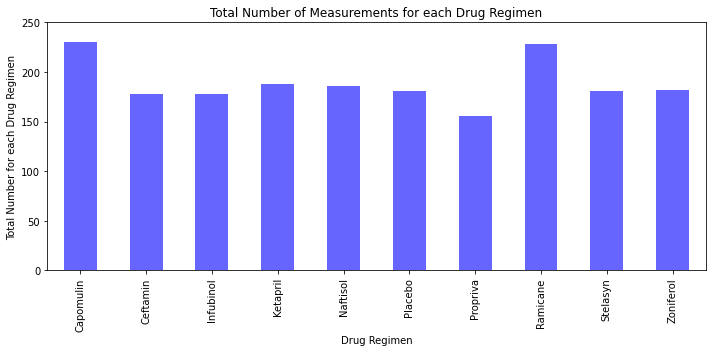

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupby_drug_df = scc_df_drop_duplicate.groupby(['Drug Regimen']).count()
countofmeasurements_df = groupby_drug_df['Mouse ID']
countofmeasurements_df

count_chart_df = countofmeasurements_df.plot(kind='bar', figsize=(10,5), color='b', alpha = .6, align="center")
count_chart_df.set_xlabel('Drug Regimen')
count_chart_df.set_ylabel('Total Number for each Drug Regimen')
count_chart_df.set_title('Total Number of Measurements for each Drug Regimen')
count_chart_df.set_ylim(0,250)
plt.tight_layout()
plt.show()


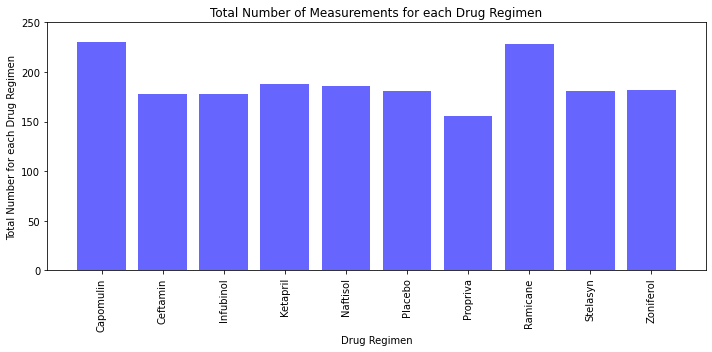

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
groupby_drug_PY_df = scc_df_drop_duplicate.groupby(['Drug Regimen']).count()
countofmeasurements_PY_df = groupby_drug_PY_df['Mouse ID']
x_axis = np.arange(len(countofmeasurements_PY_df))
x_axis

## Plot Bar Chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, countofmeasurements_PY_df, color = 'b', alpha = .6, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"], rotation='vertical')


plt.xlabel('Drug Regimen')
plt.ylabel('Total Number for each Drug Regimen')
plt.title('Total Number of Measurements for each Drug Regimen')
plt.ylim(0,250)
plt.tight_layout()
plt.show()


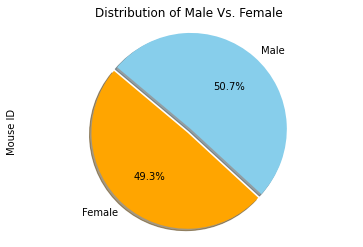

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_M_F_df = scc_df_drop_duplicate.groupby(['Sex']).count()
groupby_M_F_df
grouby_MF_df = groupby_M_F_df['Mouse ID']
grouby_MF_df.plot(kind='pie', y='Male Vs Female Mouse', title='Distribution of Male Vs. Female', explode=(0,.05), startangle=140, colors=('orange', 'skyblue'), autopct="%1.1f%%", shadow=True)

plt.axis('equal')
plt.show()

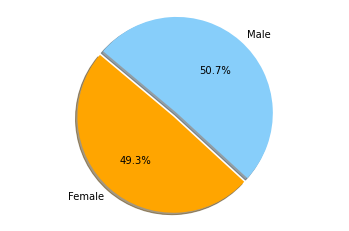

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ['Female', 'Male']

# The values of each section of the pie chart
sizes = groupby_M_F_df['Mouse ID']
sizes
# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# scc_4_reg_df = scc_df_drop_duplicate[((scc_df_drop_duplicate['Drug Regimen'] == 'Capomulin') & (scc_df_drop_duplicate['Timepoint'] == 45)) | ((scc_df_drop_duplicate['Drug Regimen'] == 'Ramicane') & (scc_df_drop_duplicate['Timepoint'] == 45)) | ((scc_df_drop_duplicate['Drug Regimen'] == 'Infubinol') & (scc_df_drop_duplicate['Timepoint'] == 45)) | ((scc_df_drop_duplicate['Drug Regimen'] == 'Ceftamin') & (scc_df_drop_duplicate['Timepoint'] == 45))] 

scc_4_reg_df = scc_df_drop_duplicate[(scc_df_drop_duplicate['Drug Regimen'] == 'Capomulin') | (scc_df_drop_duplicate['Drug Regimen'] == 'Ramicane') | (scc_df_drop_duplicate['Drug Regimen'] == 'Infubinol') | (scc_df_drop_duplicate['Drug Regimen'] == 'Ceftamin')]

scc_4_reg_df

# Start by getting the last (greatest) timepoint for each mouse
scc_45_4_reg_df = scc_4_reg_df[(scc_4_reg_df['Timepoint'] == 45)]
scc_45_4_reg_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
scc_45_4_reg_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
sec_45_4_reg_TV_df = scc_45_4_reg_df['Tumor Volume (mm3)']

quartiles = sec_45_4_reg_TV_df.quantile([.25,.5,.75])
print(quartiles)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq - lowerq
iqr

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

print(f'The lower quintile for the Tumor Volume across 4 Drug Regimens is: {lowerq}')
print(f'The upper quintile for the Tumor Volume across 4 Drug Regimens is: {upperq}')
print(f'The Interquartile for the Tumor Volume across 4 Drug Regimens is: {iqr}')
print(f'The median for the Tumor Volume across 4 Drug Regimens is: {medianq}')



lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Total volume below {lower_bound} could be the outliers')
print(f'Total volume above {upper_bound} could be the outliers')    

0.25    33.480027
0.50    40.159220
0.75    62.142214
Name: Tumor Volume (mm3), dtype: float64
The lower quintile for the Tumor Volume across 4 Drug Regimens is: 33.48002734
The upper quintile for the Tumor Volume across 4 Drug Regimens is: 62.14221369
The Interquartile for the Tumor Volume across 4 Drug Regimens is: 28.66218635
The median for the Tumor Volume across 4 Drug Regimens is: 40.1592203
Total volume below -9.513252184999999 could be the outliers
Total volume above 105.135493215 could be the outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x2266ced3848>,
 'caps': [<matplotlib.lines.Line2D at 0x2266cdd5dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2266cdcfec8>],
 'medians': [<matplotlib.lines.Line2D at 0x2266cde79c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2266cde7fc8>],
 'means': []}

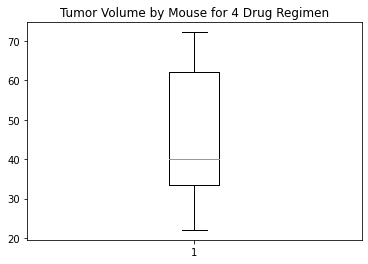

In [96]:
## Generate a box plot of the final tumor volume of each mouse across four regimens of interest
times = scc_45_4_reg_df['Tumor Volume (mm3)']
times
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Mouse for 4 Drug Regimen')
ax1.boxplot(times)

## Line and Scatter Plots

In [124]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
scc_regimen_c_df = scc_df_drop_duplicate[scc_df_drop_duplicate['Drug Regimen'] == 'Capomulin']
scc_regimen_c_df


# scc_Time_df = scc_regimen_df['Timepoint']
# scc_Time_df
# scc_TV_df = scc_regimen_df['Tumor Volume (mm3)']
# scc_TV_df
# plt.plot(scc_Time_df,scc_TV_df)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
